## Importing Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
all_datasets = [ "IEMOCAP" ,"EMODB" ,"SAVEE" ,"RAVDESS"]

In [9]:
common_emotions = pd.read_csv("common_emotion_source.csv")

In [10]:
common_emotions["Source"].value_counts()

IEMOCAP    4532
RAVDESS    1056
EMODB       535
SAVEE       420
Name: Source, dtype: int64

In [11]:
common_emotions.head()

,Emotions,Path,Source,MFCC_Image_Path,MFCC_Image_Path_10db_AWGN,MFCC_Image_Path_20db_AWGN
0,neutral,/content/DSER-MIDCA/data/IEMOCAP/Session1/sent...,IEMOCAP,mfcc_images/IEMOCAP/Session1/sentences/wav/Ses...,mfcc_images_10db/IEMOCAP/Session1/sentences/wa...,mfcc_images_20db/IEMOCAP/Session1/sentences/wa...
1,neutral,/content/DSER-MIDCA/data/IEMOCAP/Session1/sent...,IEMOCAP,mfcc_images/IEMOCAP/Session1/sentences/wav/Ses...,mfcc_images_10db/IEMOCAP/Session1/sentences/wa...,mfcc_images_20db/IEMOCAP/Session1/sentences/wa...
2,angry,/content/DSER-MIDCA/data/IEMOCAP/Session1/sent...,IEMOCAP,mfcc_images/IEMOCAP/Session1/sentences/wav/Ses...,mfcc_images_10db/IEMOCAP/Session1/sentences/wa...,mfcc_images_20db/IEMOCAP/Session1/sentences/wa...
3,angry,/content/DSER-MIDCA/data/IEMOCAP/Session1/sent...,IEMOCAP,mfcc_images/IEMOCAP/Session1/sentences/wav/Ses...,mfcc_images_10db/IEMOCAP/Session1/sentences/wa...,mfcc_images_20db/IEMOCAP/Session1/sentences/wa...
4,neutral,/content/DSER-MIDCA/data/IEMOCAP/Session1/sent...,IEMOCAP,mfcc_images/IEMOCAP/Session1/sentences/wav/Ses...,mfcc_images_10db/IEMOCAP/Session1/sentences/wa...,mfcc_images_20db/IEMOCAP/Session1/sentences/wa...


In [14]:
# Emotions to select - 
emotions_selected = ['happy', 'neutral', 'angry', 'sad']

In [ ]:
common_emotions_selected = common_emotions[common_emotions["Emotions"].isin(emotions_selected)]


In [17]:
def get_emotion_count(common_emotions):
    df_emotions=common_emotions[["Source","Emotions"]].value_counts().reset_index().sort_values(by="Source")\
    .reset_index(drop=True)
    df_emotions.columns=['Source', 'Emotions','Count']
    return df_emotions
df_emotions = get_emotion_count(common_emotions)

In [ ]:
df_emotions.Emotions.unique()

array(['disgust', 'fear', 'happy', 'neutral', 'angry', 'sad'],
      dtype=object)

<AxesSubplot:xlabel='Emotions', ylabel='Count'>

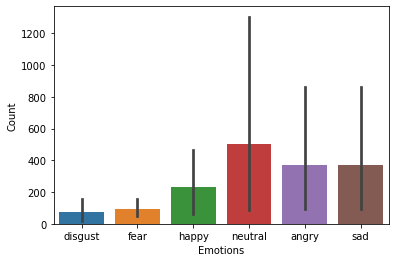

In [ ]:
sns.barplot(data=df_emotions,x="Emotions",y="Count")   


In [18]:
df_emotions = df_emotions[df_emotions["Emotions"].isin(emotions_selected)]

<AxesSubplot:xlabel='Source', ylabel='Count'>

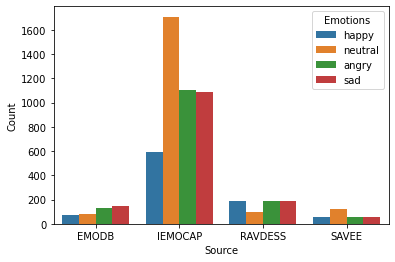

In [ ]:
sns.barplot(data=df_emotions,x="Source",y="Count",hue="Emotions")   


In [19]:
df_emotions[df_emotions["Source"]=="IEMOCAP"]

,Source,Emotions,Count
6,IEMOCAP,neutral,1708
9,IEMOCAP,happy,595
10,IEMOCAP,sad,1084
11,IEMOCAP,angry,1103


In [20]:
df_emotions[df_emotions["Source"]=="EMODB"]

,Source,Emotions,Count
2,EMODB,happy,71
3,EMODB,neutral,79
4,EMODB,angry,127
5,EMODB,sad,143


In [21]:
df_emotions[df_emotions["Source"]=="SAVEE"]

,Source,Emotions,Count
18,SAVEE,angry,60
21,SAVEE,happy,60
22,SAVEE,sad,60
23,SAVEE,neutral,120


In [22]:
df_emotions[df_emotions["Source"]=="RAVDESS"]

,Source,Emotions,Count
13,RAVDESS,happy,192
14,RAVDESS,sad,192
15,RAVDESS,neutral,96
16,RAVDESS,angry,192


In [23]:
max_sample ={ "IEMOCAP" : 1084,"EMODB" : 143,"SAVEE" : 60 , "RAVDESS": 192 }

In [24]:
train_combined_data=[]
for k,v in max_sample.items():
    training_data_source = common_emotions_selected[common_emotions_selected["Source"]==k]
    for em in emotions_selected:
        emotion_data = training_data_source[training_data_source["Emotions"]==em]
        if len(emotion_data)>v:
            train_combined_data.append(emotion_data.sample(v))
        else:
            train_combined_data.append(emotion_data)

In [27]:
df_train_data = pd.concat(train_combined_data)

In [37]:
df_train_data.columns

Index(['Emotions', 'Path', 'Source', 'MFCC_Image_Path',
       'MFCC_Image_Path_10db_AWGN', 'MFCC_Image_Path_20db_AWGN'],
      dtype='object')

In [29]:
df_emotions_train = get_emotion_count(df_train_data)

In [30]:
df_emotions_train

,Source,Emotions,Count
0,EMODB,sad,143
1,EMODB,angry,127
2,EMODB,neutral,79
3,EMODB,happy,71
4,IEMOCAP,angry,1084
5,IEMOCAP,neutral,1084
6,IEMOCAP,sad,1084
7,IEMOCAP,happy,595
8,RAVDESS,angry,192
9,RAVDESS,happy,192


In [31]:
data_sample_to_take = { "IEMOCAP" :{"happy" : 489}, "EMODB" :{"angry" : 16, "neutral" :64 , "happy" : 72},"RAVDESS" : {"neutral" : 96} }

In [32]:
data_sample_to_take

{'IEMOCAP': {'happy': 489},
 'EMODB': {'angry': 16, 'neutral': 64, 'happy': 72},
 'RAVDESS': {'neutral': 96}}

## Fixing Class Balance

In [34]:
augmented_data_10db=[]
augmented_data_20db=[]

for k,v in data_sample_to_take.items():
    training_data_source = common_emotions_selected[common_emotions_selected["Source"]==k]
    for ek, ev  in v.items():        
        emotion_data = training_data_source[training_data_source["Emotions"]==ek]
        count_10db_sample = ev//2
        count_20db_sample = ev-count_10db_sample
        augmented_data_10db.append(emotion_data.sample(count_10db_sample))
        augmented_data_20db.append(emotion_data.sample(count_20db_sample))

In [35]:
df_augmented_data_10db =pd.concat(augmented_data_10db)
df_augmented_data_20db =pd.concat(augmented_data_20db)

In [36]:
train_data = pd.DataFrame(columns=["emotion","source","path","augmented"])

In [38]:
source_train_data = df_train_data[["Emotions","Source","MFCC_Image_Path"]]

In [39]:
source_train_data["augmented"]=0

In [40]:
source_train_data.columns =  train_data.columns

In [41]:
aug_10db_train_data = df_augmented_data_10db[["Emotions","Source","MFCC_Image_Path_10db_AWGN"]]
aug_10db_train_data["augmented"]=10
aug_10db_train_data.columns =  train_data.columns

In [42]:
aug_20db_train_data = df_augmented_data_20db[["Emotions","Source","MFCC_Image_Path_20db_AWGN"]]
aug_20db_train_data["augmented"]=20
aug_20db_train_data.columns =  train_data.columns

In [43]:
train_data = pd.concat([source_train_data,aug_10db_train_data,aug_20db_train_data])

In [44]:
train_data.reset_index(drop=True,inplace=True)

In [45]:
train_data.head()

,emotion,source,path,augmented
0,happy,IEMOCAP,mfcc_images/IEMOCAP/Session1/sentences/wav/Ses...,0
1,happy,IEMOCAP,mfcc_images/IEMOCAP/Session1/sentences/wav/Ses...,0
2,happy,IEMOCAP,mfcc_images/IEMOCAP/Session1/sentences/wav/Ses...,0
3,happy,IEMOCAP,mfcc_images/IEMOCAP/Session1/sentences/wav/Ses...,0
4,happy,IEMOCAP,mfcc_images/IEMOCAP/Session1/sentences/wav/Ses...,0


In [46]:
train_data["emotion"].value_counts()

happy      1479
neutral    1479
angry      1479
sad        1479
Name: emotion, dtype: int64

In [47]:
train_data["source"].value_counts()

IEMOCAP    4336
RAVDESS     768
EMODB       572
SAVEE       240
Name: source, dtype: int64

In [48]:
train_data[["source","emotion"]].value_counts()

source   emotion
IEMOCAP  angry      1084
         happy      1084
         neutral    1084
         sad        1084
RAVDESS  angry       192
         happy       192
         neutral     192
         sad         192
EMODB    angry       143
         happy       143
         neutral     143
         sad         143
SAVEE    angry        60
         happy        60
         neutral      60
         sad          60
dtype: int64

In [49]:
train_data.to_csv("train_data_all.csv",index=False)

## Adding more augmented data for generalization

In [50]:
aug_gen_data = []
for source in train_data["source"].unique():
    training_data_source = common_emotions_selected[common_emotions_selected["Source"]==source]
    sample_to_take = max_sample[source]//10
    for em in emotions_selected:
        emotion_data = training_data_source[training_data_source["Emotions"]==em]
        aug_10db = emotion_data[["Emotions","Source","MFCC_Image_Path_10db_AWGN"]]
        aug_10db["augmented"] = 10
        aug_10db.columns = train_data.columns
        aug_10db =  aug_10db[~aug_10db["path"].isin(train_data["path"])]
        aug_gen_data.append(aug_10db.sample(sample_to_take))
                                
        aug_20db = emotion_data[["Emotions","Source","MFCC_Image_Path_20db_AWGN"]]
        aug_20db["augmented"] = 20
        aug_20db.columns = train_data.columns
        aug_20db =  aug_20db[~aug_20db["path"].isin(train_data["path"])]
        aug_gen_data.append(aug_20db.sample(sample_to_take))

In [51]:
df_aug_gen_data = pd.concat(aug_gen_data)

In [52]:
df_aug_gen_data["emotion"].value_counts()

happy      294
neutral    294
angry      294
sad        294
Name: emotion, dtype: int64

In [53]:
train_data = pd.concat([train_data,df_aug_gen_data])

In [54]:
train_data.reset_index(drop=True,inplace=True)

In [55]:
train_data.to_csv("train_data_all.csv",index=False)

In [56]:
train_data["emotion"].value_counts()

happy      1773
neutral    1773
angry      1773
sad        1773
Name: emotion, dtype: int64

In [57]:
train_data["source"].value_counts()

IEMOCAP    5200
RAVDESS     920
EMODB       684
SAVEE       288
Name: source, dtype: int64

In [58]:
train_data[["source","emotion"]].value_counts()

source   emotion
IEMOCAP  angry      1300
         happy      1300
         neutral    1300
         sad        1300
RAVDESS  angry       230
         happy       230
         neutral     230
         sad         230
EMODB    angry       171
         happy       171
         neutral     171
         sad         171
SAVEE    angry        72
         happy        72
         neutral      72
         sad          72
dtype: int64

## Creating Datasets

In [60]:
train_data["emotion_class"] = train_data["emotion"].astype("category").cat.codes

In [74]:
train_data.to_csv("train_data_all.csv",index=False)